# Material structure to intrinsic properties lookup

Instead of using a particular spin dynamics software and querying the input files, we start from the material structure and extract the intrinsic properties as a function of temperature.

In [1]:
from mammos_spindynamics.db import find_materials, get_M

As a first example, we extract a material given the formula and space group information.

In [2]:
M = get_M(
    formula="Y2Ti4Fe18",
    space_group_name="P4/mbm",
    space_group_number=127,
)

Found material in database.

Chemical Formula: Y2Ti4Fe18
Space group name: P4/mbm
Space group number: 127
Cell length a: 8.186244
Cell length b: 8.186244
Cell length c: 4.892896
Cell angle alpha: 90.0
Cell angle beta: 90.0
Cell angle gamma: 90.0
Cell volume: 327.8954234
ICSD_label: nan
OQMD_label: nan

Some materials are published in bigger databases, such as the NIST Inorganic Crystal Structure Database (ICSD) or the Open Quantum Materials Database (OQMD).
We can query for such materials using those databases' labels:

In [3]:
M = get_M(ICSD_label="600596")

Found material in database.

Chemical Formula: CrNiP
Space group name: P-62m
Space group number: 189
Cell length a: 5.84
Cell length b: 5.84
Cell length c: 3.514
Cell angle alpha: 90.0
Cell angle beta: 90.0
Cell angle gamma: 120.0
Cell volume: 103.79
ICSD_label: 600596
OQMD_label: icsd-600596

## How to look for a material?
We can use the function `find_material` to list all materials satisfying certain constraints:

In [4]:
find_materials()

,formula,space_group_name,space_group_number,cell_length_a,cell_length_b,cell_length_c,cell_angle_alpha,cell_angle_beta,cell_angle_gamma,cell_volume,ICSD_label,OQMD_label,label
0,Co2Fe2H4,P6_3/mmc,194,2.645345,2.645314,8.539476,90.0,90.0,120.0,51.751119,NaN,NaN,0001
1,CrNiP,P-62m,189,5.840000,5.840000,3.514000,90.0,90.0,120.0,103.790000,600596,icsd-600596,0002
2,Y2Ti4Fe18,P4/mbm,127,8.186244,8.186244,4.892896,90.0,90.0,90.0,327.895423,NaN,NaN,0003


In [5]:
find_materials(formula="CrNiP")

,formula,space_group_name,space_group_number,cell_length_a,cell_length_b,cell_length_c,cell_angle_alpha,cell_angle_beta,cell_angle_gamma,cell_volume,ICSD_label,OQMD_label,label
1,CrNiP,P-62m,189,5.84,5.84,3.514,90.0,90.0,120.0,103.79,600596,icsd-600596,0002


## What is `M`?

In [6]:
type(M)

scipy.interpolate._interpolate.interp1d

The table we have loaded looks like this:

In [7]:
import pandas as pd

df = pd.read_csv("../src/mammos_spindynamics/db/data/0003/M.csv")
df

,T[K],M[muB],M^2,M^4,U_Binder,chi,C_v(tot),E,E_exc,E_lsf
0,10,1.862562,3.469137,1.203492e+01,0.666667,0.002788,1.012398,-8.575637,-8.575637,0.0
1,30,1.813005,3.286990,1.080432e+01,0.666666,0.006225,0.908200,-8.448294,-8.448294,0.0
2,50,1.767635,3.124536,9.762764e+00,0.666665,0.006492,1.050185,-8.320102,-8.320102,0.0
3,70,1.720170,2.958986,8.755630e+00,0.666665,0.004282,1.057235,-8.191044,-8.191044,0.0
4,90,1.677340,2.813472,7.915658e+00,0.666665,0.003851,0.984763,-8.061073,-8.061073,0.0
5,110,1.629221,2.654371,7.045786e+00,0.666662,0.009731,0.958378,-7.929904,-7.929904,0.0
6,130,1.589929,2.527893,6.390419e+00,0.666657,0.015153,0.981410,-7.797645,-7.797645,0.0
7,150,1.542855,2.380417,5.666536e+00,0.666658,0.011878,1.066596,-7.664030,-7.664030,0.0
8,170,1.501660,2.255025,5.085513e+00,0.666642,0.027744,1.066178,-7.529041,-7.529041,0.0
9,190,1.457658,2.124792,4.514957e+00,0.666651,0.014929,1.031491,-7.392399,-7.392399,0.0


`M` is the linear interpolating function. We can recover the `x` values with:

In [8]:
M.x

array([  2,   5,  10,  50, 100, 150, 200, 250, 300, 400, 500, 600, 700])

and the `y` values with:

In [9]:
M.y

array([0.00113 , 0.000749, 0.000373, 0.001017, 0.001091, 0.001307,
       0.00152 , 0.001692, 0.001842, 0.002092, 0.002304, 0.002426,
       0.0025  ])

Then, we can evaluate it at any other point inside the interval defined by min(`x`) and max(`x`):

In [10]:
M(450)

array(0.002198)

In [11]:
M(1)  # ValueError

ValueError: A value (1.0) in x_new is below the interpolation range's minimum value (2).

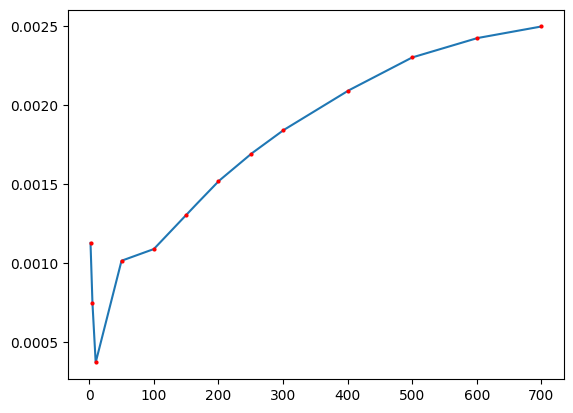

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.arange(min(M.x), max(M.x), 1)
yy = M(xx)

plt.plot(xx, yy)
plt.plot(M.x, M.y, "o", color="red", markersize=2)

## What if we used quadratic interpolation?
We can specify the interpolation type in the function `get_M`.
The valid options are defined in the [`interp1d` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

Found material in database.

Chemical Formula: CrNiP
Space group name: P-62m
Space group number: 189
Cell length a: 5.84
Cell length b: 5.84
Cell length c: 3.514
Cell angle alpha: 90.0
Cell angle beta: 90.0
Cell angle gamma: 120.0
Cell volume: 103.79
ICSD_label: 600596
OQMD_label: icsd-600596

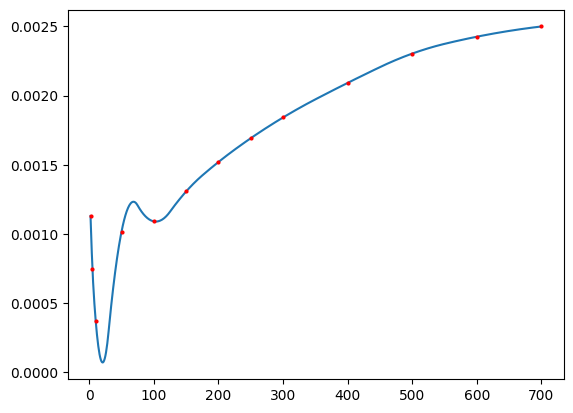

In [13]:
M2 = get_M(formula="CrNiP", interpolation_kind="quadratic")

yy2 = M2(xx)
plt.plot(xx, yy2)
plt.plot(M2.x, M2.y, "o", color="red", markersize=2)